In [26]:
# Imports necesarios
import random
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sp
from greedy import greedy_monedas
from util import time_algorithm

random.seed(12345)
np.random.seed(12345)
sns.set_theme()


In [27]:
VARIABILIDAD_BAJA = 10
VARIABILIDAD_ALTA = 1000000

# Tamaños del array
x = np.linspace(1000, 500_000, 20).astype(int)

# Generador de monedas aleatorias
def get_random_cant_monedas(s, var):
    return [random.randint(1, var) for _ in range(s)]

# Medimos los tiempos de ejecución
results_low_var = time_algorithm(greedy_monedas, x, lambda s: [get_random_cant_monedas(s,VARIABILIDAD_BAJA)])
results_high_var = time_algorithm(greedy_monedas, x, lambda s: [get_random_cant_monedas(s,VARIABILIDAD_ALTA)])
print(results_low_var,results_high_var)


{np.int64(1000): 0.00039989948272705077, np.int64(27263): 0.007207107543945312, np.int64(53526): 0.015398883819580078, np.int64(79789): 0.02199852466583252, np.int64(106052): 0.02870326042175293, np.int64(132315): 0.04020261764526367, np.int64(158578): 0.043297553062438966, np.int64(184842): 0.049190831184387204, np.int64(211105): 0.061260533332824704, np.int64(237368): 0.0672071933746338, np.int64(263631): 0.0744697093963623, np.int64(289894): 0.07598667144775391, np.int64(316157): 0.08671212196350098, np.int64(342421): 0.09310290813446045, np.int64(368684): 0.10490801334381103, np.int64(394947): 0.11379499435424804, np.int64(421210): 0.12272298336029053, np.int64(447473): 0.12010159492492675, np.int64(473736): 0.13446106910705566, np.int64(500000): 0.1409994602203369} {np.int64(1000): 5.3262710571289064e-05, np.int64(27263): 0.008390331268310547, np.int64(53526): 0.01720125675201416, np.int64(79789): 0.027498841285705566, np.int64(106052): 0.030896925926208497, np.int64(132315): 0.03

Text(0, 0.5, 'Tiempo de ejecución (s)')

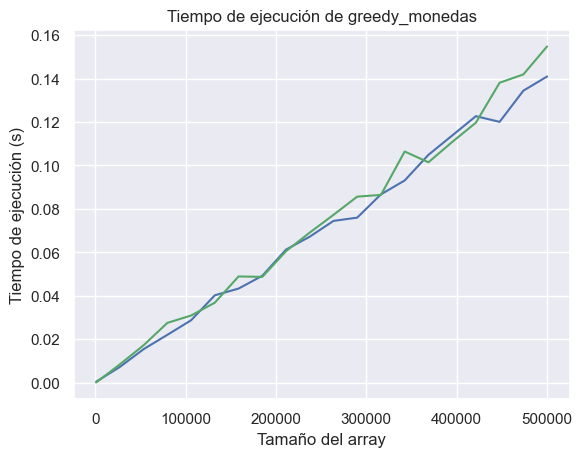

In [28]:
# Graficamos los resultados baja variabilidad
fig, ax = plt.subplots()
ax.plot(x, [results_low_var[n] for n in x], 'b-', label="Baja variabilidad") 
ax.plot(x, [results_high_var[n] for n in x], 'g-', label="Alta variabilidad") 
ax.set_title('Tiempo de ejecución de greedy_monedas')
ax.set_xlabel('Tamaño del array')
ax.set_ylabel('Tiempo de ejecución (s)')

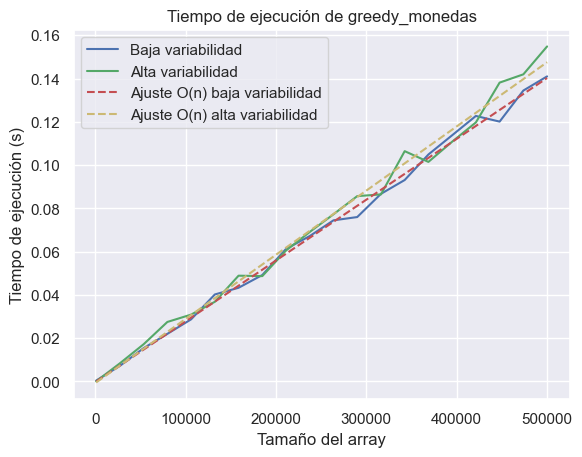

In [29]:
# Ajuste O(n)
f_n = lambda x, c1, c2: c1 * x + c2
c_nlv, _ = sp.optimize.curve_fit(f_n, x, [results_low_var[n] for n in x])
c_nhv, _ = sp.optimize.curve_fit(f_n, x, [results_high_var[n] for n in x])
ax.plot(x, [f_n(n, *c_nlv) for n in x], 'r--', label="Ajuste O(n) baja variabilidad")
ax.plot(x, [f_n(n, *c_nhv) for n in x], 'y--', label="Ajuste O(n) alta variabilidad")

ax.legend()
fig

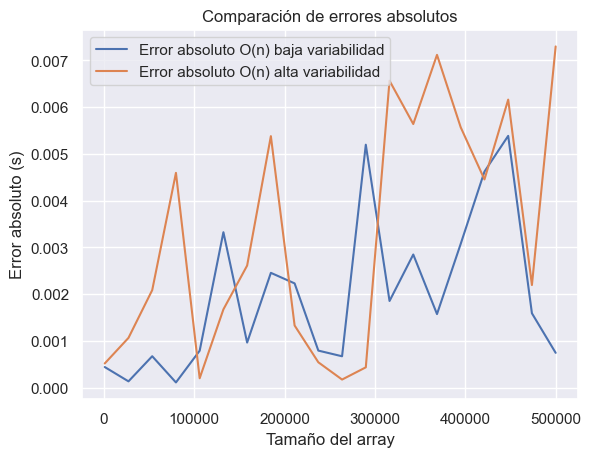

In [30]:
# Graficar los errores absolutos de los ajustes
fig, ax = plt.subplots()


# Graficar
ax.plot(x, [np.abs(f_n(n, *c_nlv) - results_low_var[n]) for n in x], label="Error absoluto O(n) baja variabilidad")
ax.plot(x, [np.abs(f_n(n, *c_nhv) - results_high_var[n]) for n in x], label="Error absoluto O(n) alta variabilidad")

ax.set_title("Comparación de errores absolutos")
ax.set_xlabel("Tamaño del array")
ax.set_ylabel("Error absoluto (s)")
ax.legend()

In [31]:
# Imprimir parámetros ajustados y errores
print(f"Ajuste O(n) baja variabilidad: c_1 = {c_nlv[0]}, c_2 = {c_nlv[1]}")
r_nlv = np.sum((f_n(x, *c_nlv) - [results_low_var[n] for n in x])**2)
print(f"Error cuadrático total (O(n)) con baja variabilidad: {r_nlv}")

print(f"Ajuste O(n) alta variabilidad: c_1 = {c_nhv[0]}, c_2 = {c_nhv[1]}")
r_nhv = np.sum((f_n(x, *c_nhv) - [results_high_var[n] for n in x])**2)
print(f"Error cuadrático total (O(n)) con alta variabilidad: {r_nhv}")

# Comparar y determinar cuál tiene menor error
if r_nlv < r_nhv:
    print("El ajuste con baja variabilidad tiene menor error cuadrático total.")
elif r_nlv > r_nhv:
    print("El ajuste con alta variabilidad tiene menor error cuadrático total.")

Ajuste O(n) baja variabilidad: c_1 = 2.8115410522018533e-07, c_2 = -0.0003226805645757369
Error cuadrático total (O(n)) con baja variabilidad: 0.00012928187685199582
Ajuste O(n) alta variabilidad: c_1 = 2.9661875018765346e-07, c_2 = -0.0007614333141868678
Error cuadrático total (O(n)) con alta variabilidad: 0.00034005207636375655
El ajuste con baja variabilidad tiene menor error cuadrático total.
